In [1]:
# ============================================================
# 06_LOSO_cross_validation.ipynb
# Leave-One-Subject-Out cross-validation for WESAD
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set_style("whitegrid")

# ============================================================
# 1 Load cleaned dataset
# ============================================================

df = pd.read_csv("wesad_cleaned_ready.csv")

feature_cols = [c for c in df.columns if c not in ["subject", "label", "binary_label"]]
X = df[feature_cols]
y_3class = df["label"]
y_binary = df["binary_label"]
subjects = df["subject"]

unique_subjects = sorted(subjects.unique())

print("Subjects:", unique_subjects)
print("Total samples:", len(df))
print("Features:", len(feature_cols))


Subjects: ['S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
Total samples: 19218
Features: 30


In [2]:
# ============================================================
# 2 Helpers
# ============================================================

def evaluate_fold(model, X_train, y_train, X_test, y_test):
    """Trains model and computes accuracy + F1_macro"""
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred), f1_score(y_test, pred, average="macro"), pred


def plot_cm(cm, labels, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="mako",
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


In [3]:
# ============================================================
# 3 Models used in LOSO
# ============================================================

# Logistic Regression — 3-class + binary
logreg = LogisticRegression(max_iter=500, n_jobs=-1)

# Baseline RF (z 04)
rf_baseline = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Tuned RF (z 05)
rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Tuned MLP (z 05)
mlp_tuned = MLPClassifier(
    hidden_layer_sizes=(256,128,64),
    activation="relu",
    alpha=0.0005,
    learning_rate_init=0.001,
    early_stopping=True,
    max_iter=300,
    random_state=42
)


In [4]:
# ============================================================
# 4 LOSO for 3-class classification
# ============================================================

models_3c = {
    "LogReg_3c": logreg,
    "RF_baseline_3c": rf_baseline,
    "RF_tuned_3c": rf_tuned,
    "MLP_tuned_3c": mlp_tuned
}

results_3c = {name: [] for name in models_3c.keys()}

print("Running LOSO – 3-class...")

for subj in unique_subjects:
    print(f"\nTest subject = {subj}")

    train_idx = subjects != subj
    test_idx = subjects == subj

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_3class[train_idx], y_3class[test_idx]

    for name, model in models_3c.items():
        acc, f1, pred = evaluate_fold(model, X_train, y_train, X_test, y_test)
        results_3c[name].append(f1)
        print(f"{name}: F1_macro = {f1:.3f}")

print("\nLOSO finished (3-class).")


Running LOSO – 3-class...

📌 Test subject = S10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_3c: F1_macro = 0.547
RF_baseline_3c: F1_macro = 0.323
RF_tuned_3c: F1_macro = 0.361
MLP_tuned_3c: F1_macro = 0.580

📌 Test subject = S11


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_3c: F1_macro = 0.419
RF_baseline_3c: F1_macro = 0.575
RF_tuned_3c: F1_macro = 0.568
MLP_tuned_3c: F1_macro = 0.624

📌 Test subject = S13


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_3c: F1_macro = 0.472
RF_baseline_3c: F1_macro = 0.462
RF_tuned_3c: F1_macro = 0.505
MLP_tuned_3c: F1_macro = 0.471

📌 Test subject = S14
LogReg_3c: F1_macro = 0.503
RF_baseline_3c: F1_macro = 0.250
RF_tuned_3c: F1_macro = 0.248
MLP_tuned_3c: F1_macro = 0.338

📌 Test subject = S15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_3c: F1_macro = 0.322
RF_baseline_3c: F1_macro = 0.438
RF_tuned_3c: F1_macro = 0.438
MLP_tuned_3c: F1_macro = 0.443

📌 Test subject = S16
LogReg_3c: F1_macro = 0.598
RF_baseline_3c: F1_macro = 0.543
RF_tuned_3c: F1_macro = 0.557
MLP_tuned_3c: F1_macro = 0.704

📌 Test subject = S17
LogReg_3c: F1_macro = 0.480
RF_baseline_3c: F1_macro = 0.474
RF_tuned_3c: F1_macro = 0.499
MLP_tuned_3c: F1_macro = 0.612

📌 Test subject = S2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_3c: F1_macro = 0.499
RF_baseline_3c: F1_macro = 0.423
RF_tuned_3c: F1_macro = 0.429
MLP_tuned_3c: F1_macro = 0.361

📌 Test subject = S3
LogReg_3c: F1_macro = 0.352
RF_baseline_3c: F1_macro = 0.437
RF_tuned_3c: F1_macro = 0.510
MLP_tuned_3c: F1_macro = 0.479

📌 Test subject = S4


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_3c: F1_macro = 0.384
RF_baseline_3c: F1_macro = 0.337
RF_tuned_3c: F1_macro = 0.301
MLP_tuned_3c: F1_macro = 0.697

📌 Test subject = S5
LogReg_3c: F1_macro = 0.647
RF_baseline_3c: F1_macro = 0.262
RF_tuned_3c: F1_macro = 0.253
MLP_tuned_3c: F1_macro = 0.430

📌 Test subject = S6
LogReg_3c: F1_macro = 0.477
RF_baseline_3c: F1_macro = 0.372
RF_tuned_3c: F1_macro = 0.404
MLP_tuned_3c: F1_macro = 0.395

📌 Test subject = S7
LogReg_3c: F1_macro = 0.667
RF_baseline_3c: F1_macro = 0.406
RF_tuned_3c: F1_macro = 0.419
MLP_tuned_3c: F1_macro = 0.434

📌 Test subject = S8


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_3c: F1_macro = 0.547
RF_baseline_3c: F1_macro = 0.322
RF_tuned_3c: F1_macro = 0.314
MLP_tuned_3c: F1_macro = 0.361

📌 Test subject = S9
LogReg_3c: F1_macro = 0.393
RF_baseline_3c: F1_macro = 0.484
RF_tuned_3c: F1_macro = 0.562
MLP_tuned_3c: F1_macro = 0.613

LOSO finished (3-class).


In [5]:
# ============================================================
# 5 LOSO for binary classification
# ============================================================

models_bin = {
    "LogReg_bin": logreg,
    "RF_baseline_bin": rf_baseline,
    "RF_tuned_bin": rf_tuned,
    "MLP_tuned_bin": mlp_tuned
}

results_bin = {name: [] for name in models_bin.keys()}

print("Running LOSO – binary...")

for subj in unique_subjects:
    print(f"\nTest subject = {subj}")

    train_idx = subjects != subj
    test_idx = subjects == subj

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_binary[train_idx], y_binary[test_idx]

    for name, model in models_bin.items():
        acc, f1, pred = evaluate_fold(model, X_train, y_train, X_test, y_test)
        results_bin[name].append(f1)
        print(f"{name}: F1_macro = {f1:.3f}")

print("\nLOSO finished (binary).")


Running LOSO – binary...

📌 Test subject = S10
LogReg_bin: F1_macro = 0.709
RF_baseline_bin: F1_macro = 0.554
RF_tuned_bin: F1_macro = 0.562
MLP_tuned_bin: F1_macro = 0.709

📌 Test subject = S11
LogReg_bin: F1_macro = 0.638
RF_baseline_bin: F1_macro = 0.644
RF_tuned_bin: F1_macro = 0.633
MLP_tuned_bin: F1_macro = 0.807

📌 Test subject = S13
LogReg_bin: F1_macro = 0.759
RF_baseline_bin: F1_macro = 0.739
RF_tuned_bin: F1_macro = 0.822
MLP_tuned_bin: F1_macro = 0.782

📌 Test subject = S14


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_bin: F1_macro = 0.585
RF_baseline_bin: F1_macro = 0.462
RF_tuned_bin: F1_macro = 0.457
MLP_tuned_bin: F1_macro = 0.486

📌 Test subject = S15
LogReg_bin: F1_macro = 0.481
RF_baseline_bin: F1_macro = 0.672
RF_tuned_bin: F1_macro = 0.685
MLP_tuned_bin: F1_macro = 0.725

📌 Test subject = S16
LogReg_bin: F1_macro = 0.834
RF_baseline_bin: F1_macro = 0.499
RF_tuned_bin: F1_macro = 0.530
MLP_tuned_bin: F1_macro = 0.836

📌 Test subject = S17


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg_bin: F1_macro = 0.500
RF_baseline_bin: F1_macro = 0.490
RF_tuned_bin: F1_macro = 0.466
MLP_tuned_bin: F1_macro = 0.643

📌 Test subject = S2
LogReg_bin: F1_macro = 0.466
RF_baseline_bin: F1_macro = 0.464
RF_tuned_bin: F1_macro = 0.463
MLP_tuned_bin: F1_macro = 0.463

📌 Test subject = S3
LogReg_bin: F1_macro = 0.555
RF_baseline_bin: F1_macro = 0.580
RF_tuned_bin: F1_macro = 0.675
MLP_tuned_bin: F1_macro = 0.611

📌 Test subject = S4
LogReg_bin: F1_macro = 0.479
RF_baseline_bin: F1_macro = 0.484
RF_tuned_bin: F1_macro = 0.506
MLP_tuned_bin: F1_macro = 0.758

📌 Test subject = S5
LogReg_bin: F1_macro = 0.687
RF_baseline_bin: F1_macro = 0.458
RF_tuned_bin: F1_macro = 0.456
MLP_tuned_bin: F1_macro = 0.674

📌 Test subject = S6
LogReg_bin: F1_macro = 0.596
RF_baseline_bin: F1_macro = 0.470
RF_tuned_bin: F1_macro = 0.469
MLP_tuned_bin: F1_macro = 0.475

📌 Test subject = S7
LogReg_bin: F1_macro = 0.793
RF_baseline_bin: F1_macro = 0.452
RF_tuned_bin: F1_macro = 0.456
MLP_tuned_bin: F1_macro 

In [6]:
# ============================================================
# 6 Summary table – 3-class
# ============================================================

summary_3c = []

for name, scores in results_3c.items():
    summary_3c.append([
        name,
        np.mean(scores),
        np.std(scores),
        np.min(scores),
        np.max(scores)
    ])

df_summary_3c = pd.DataFrame(
    summary_3c,
    columns=["Model", "Mean F1", "Std", "Min", "Max"]
)

df_summary_3c


,Model,Mean F1,Std,Min,Max
0,LogReg_3c,0.487109,0.099207,0.322182,0.666638
1,RF_baseline_3c,0.407185,0.092626,0.249711,0.575314
2,RF_tuned_3c,0.424556,0.106134,0.247894,0.567869
3,MLP_tuned_3c,0.502790,0.120310,0.337723,0.703549


In [7]:
# ============================================================
# 7 Summary table – binary
# ============================================================

summary_bin = []

for name, scores in results_bin.items():
    summary_bin.append([
        name,
        np.mean(scores),
        np.std(scores),
        np.min(scores),
        np.max(scores)
    ])

df_summary_bin = pd.DataFrame(
    summary_bin,
    columns=["Model", "Mean F1", "Std", "Min", "Max"]
)

df_summary_bin


,Model,Mean F1,Std,Min,Max
0,LogReg_bin,0.610371,0.117372,0.466268,0.834268
1,RF_baseline_bin,0.529145,0.087126,0.451975,0.738970
2,RF_tuned_bin,0.551195,0.109557,0.455672,0.822030
3,MLP_tuned_bin,0.649685,0.120772,0.462559,0.835876


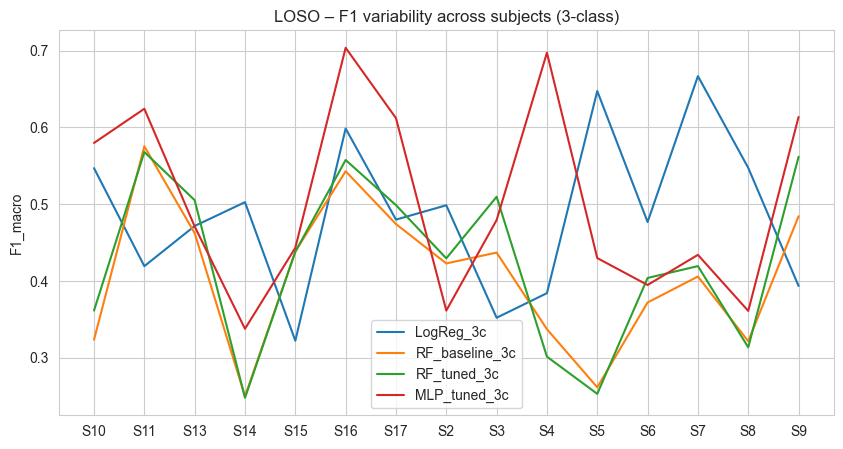

In [8]:
# ============================================================
# 8 Visualization – LOSO variability
# ============================================================

plt.figure(figsize=(10,5))
for name, scores in results_3c.items():
    plt.plot(scores, label=name)

plt.xticks(range(len(unique_subjects)), unique_subjects)
plt.ylabel("F1_macro")
plt.title("LOSO – F1 variability across subjects (3-class)")
plt.legend()
plt.show()


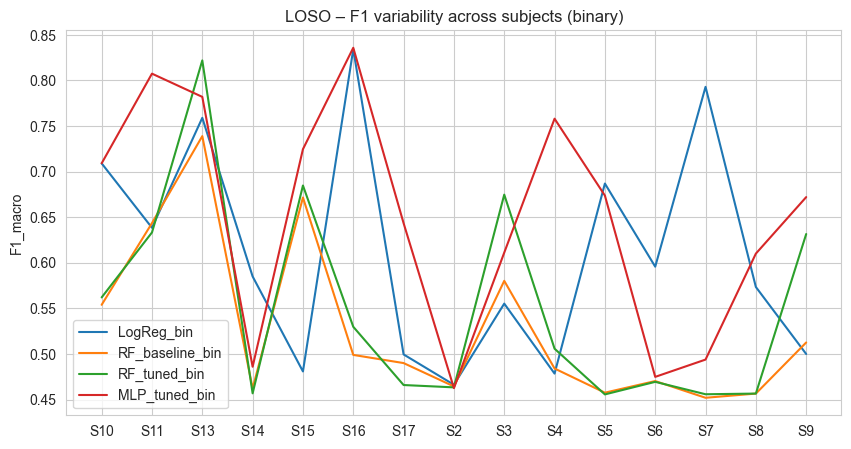

In [9]:
plt.figure(figsize=(10,5))
for name, scores in results_bin.items():
    plt.plot(scores, label=name)

plt.xticks(range(len(unique_subjects)), unique_subjects)
plt.ylabel("F1_macro")
plt.title("LOSO – F1 variability across subjects (binary)")
plt.legend()
plt.show()


In [ ]:
# ============================================================
# NOTES — 06_LOSO_cross_validation
# ============================================================

# 1. LOSO wykonuje pełną walidację leave-one-subject-out:
#    w każdym foldzie jeden uczestnik jest testowy, reszta treningowa.
#    To standard naukowy dla sygnałów fizjologicznych.

# 2. Wyniki są znacząco niższe niż przy 70/30 split,
#    ponieważ LOSO bada generalizację międzyosobniczą,
#    czyli najtrudniejszy scenariusz dla modelu.

# 3. Tabela wyników (mean, std, min, max F1) pokazuje:
#    - jak stabilny jest model pomiędzy osobami,
#    - jak bardzo osobnicza jest odpowiedź fizjologiczna na stres.

# 4. Modele tuned (RF_tuned, MLP_tuned) powinny mieć wyższe mean F1
#    niż modele bazowe (LogReg, RF_baseline), ale z większym rozrzutem.

# 5. LOSO jest kluczową walidacją do pracy dyplomowej — pokazuje,
#    czy model ma potencjał kliniczny i jak zachowuje się
#    na zupełnie nowych użytkownikach.
